#Simulation_OLP

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import math


import Simulation_OLP
from Simulation_OLP import *
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

#from importlib import reload
#package_DBR = reload (package_DBR)

In [98]:
nameFile = 'Data/Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-09h21.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)  

MV


In [99]:
help(initialize_constants)

Help on function initialize_constants in module Simulation_OLP:

initialize_constants()
    Initializes and returns the constants Tu, Tg, Kp, a, t1, t2 used in the control theory laboratory.
    Usage : Tu, Tg, Kp, a, t1, t2 = initialize_constants()
    
    Returns:
    Tu (float): Ultimate period.
    Tg (float): Ultimate gain.
    Kp (float): Process gain.
    a (float): Constant a.
    t1 (float): Constant t1.
    t2 (float): Constant t2.
    
    which are obtained from the open loop process transfer function grphcally.



In [100]:
Tu, Tg, Kp, a, t1, t2 = initialize_constants()
print('Tu =', Tu, 'Tg =', Tg, 'Kp =', Kp, 'a =', a, 't1 =', t1, 't2 =', t2)

Tu = 14.0 Tg = 154.0 Kp = 39.1 a = 13.0 t1 = 58.0 t2 = 85.0


In [101]:
TSim = 720  # Simulation Time [s]
Ts = 1.0    # Sampling Period [s]
N = int(TSim / Ts) + 1

t = np.linspace(0, TSim, N)

MV = []
MVPath = {0: 0, 1: 1, TSim: 1}

SelectPath_RT(MVPath, t, MV)


In [102]:
help(Broida1)

Help on function Broida1 in module Simulation_OLP:

Broida1()
    create step response of the system defined by the transfer function Pb(s) = (Kp*e^(-theta*s))/(Ts+1)
    with T=Tg and theta = Tu.
    
    Parameters:



In [103]:
T_B1 = Tg 
theta_B1 = Tu

In [104]:
T_B2 = 5.5*(t2 - t1) 
theta_B2 = (2.8*t1) - (1.8*t2)

In [105]:
ratio = Tu/Tg

#Computation of Strejc model parameters
table_a = {1 : 0, 2 : 0.1, 3 : 0.22, 4 : 0.32, 5 : 0.41, 6 : 0.49, 7 : 0.57}
table_b = {1 : 1, 2 : 2.72, 3 : 3.69, 4 : 4.46, 5 : 5.12, 6 : 5.7, 7 : 6.23} 

#Order
n = 0

for key, value in table_a.items() : 
    if value <= ratio and ratio < table_a[key+1] :
        n = key

a_n = table_a[n]
b_n = table_b[n]

T_T = Tg / b_n
T_u_th_T = a_n * Tg
theta_T = Tu - T_u_th_T

base_T = Ts + 1

In [106]:
T1_VDG = Tg * (3 * a * np.exp(1) - 1)/(1 + a * np.exp(1))
T2_VDG = Tg*(1-a*np.exp(1))/(1+a*np.exp(1))
theta_VDG = Tu - (T1_VDG*T2_VDG)/(T1_VDG + 3*T2_VDG)

print(f'van der Grinten : T1 = {T1_VDG}, T2 = {T2_VDG}, theta = {theta_VDG}')

van der Grinten : T1 = 445.0478920191586, T2 = -145.52394600957928, theta = 7654.952438843296


In [107]:
nameFile = 'Data/Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-09h21.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)  

MV


(0.0, 573.0)

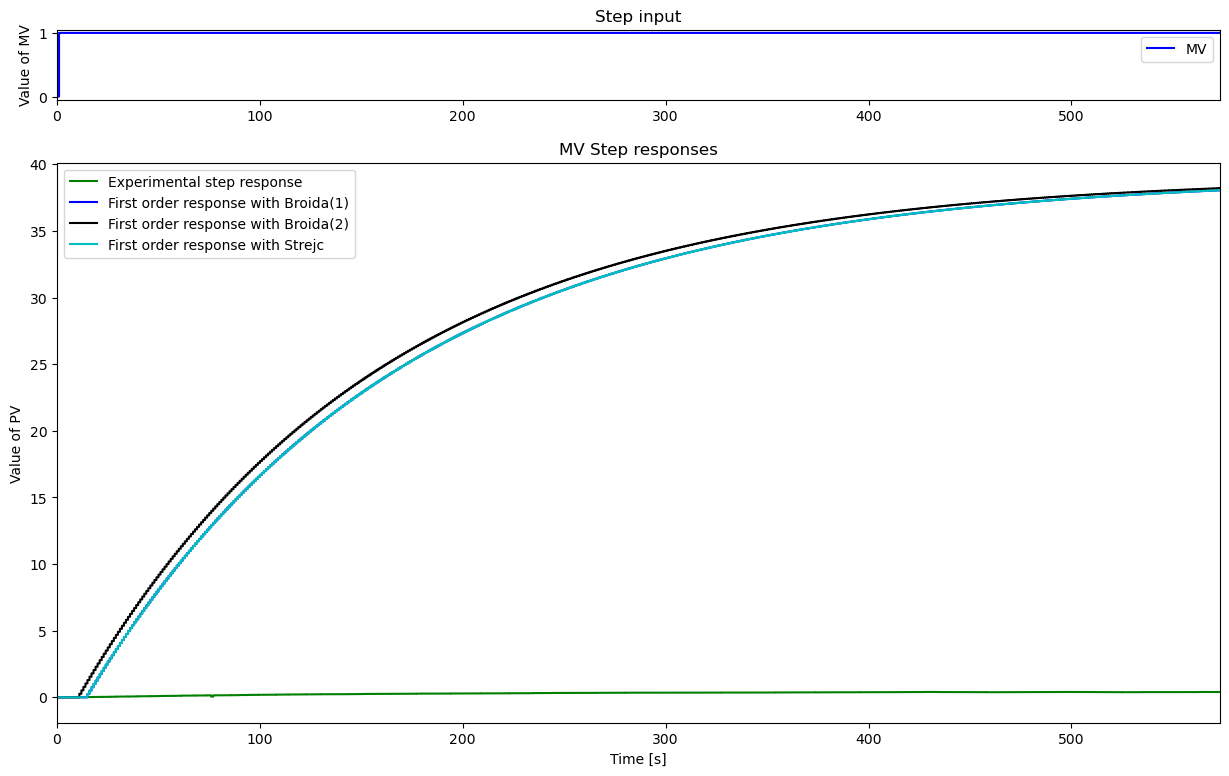

In [108]:
FOPDT_P_B1 = FOPDT(MVm, Kp, T_B1, theta_B1, Ts)
FOPDT_P_B2 = FOPDT(MVm, Kp, T_B2, theta_B2, Ts)
FOPDT_P_T = FOPDT(MVm, Kp, T_T, theta_T, Ts)
FOPDT_P_VDG = SOPDT(MVm, Kp, T1_VDG, T2_VDG, theta_VDG, Ts)

fig, axs = plt.subplots(2, 1, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 8]})

axs[0].step(tm, MVm, 'b-', label='MV', where='post')
axs[0].set_ylabel('Value of MV')
axs[0].set_title('Step input')
axs[0].legend(loc='best')
axs[0].set_xlim([0, np.max(tm)])

axs[1].step(tm, PVm, 'g-', label='Experimental step response', where='post')
#axs[1].step(tm, PV_OMV_FOPDT, 'cyan', label='First order response with optimal parameters', where='post')
#axs[1].step(tm, PV_OMV_SOPDT, 'lime', label='Second order response with optimal parameters', where='post')
axs[1].step(tm, FOPDT_P_B1, 'b-', label='First order response with Broida(1)', where='post')
axs[1].step(tm, FOPDT_P_B2, 'k-', label='First order response with Broida(2)', where='post')
#axs[1].step(tm, PV_G, 'r-', label='Second order response with van der Grinten', where='post')
axs[1].step(tm, FOPDT_P_T, 'c-', label='First order response with Strejc', where='post')
axs[1].set_ylabel('Value of PV')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('MV Step responses')
axs[1].legend(loc='best')
axs[1].set_xlim([0, np.max(tm)])

In [109]:
nameFile = '/home/comus3/Documents/Git/controlTheoryLabFiles/Control_theory_software_V3/Data/Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-09h21.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)    

MV


(0.0, 600.0)

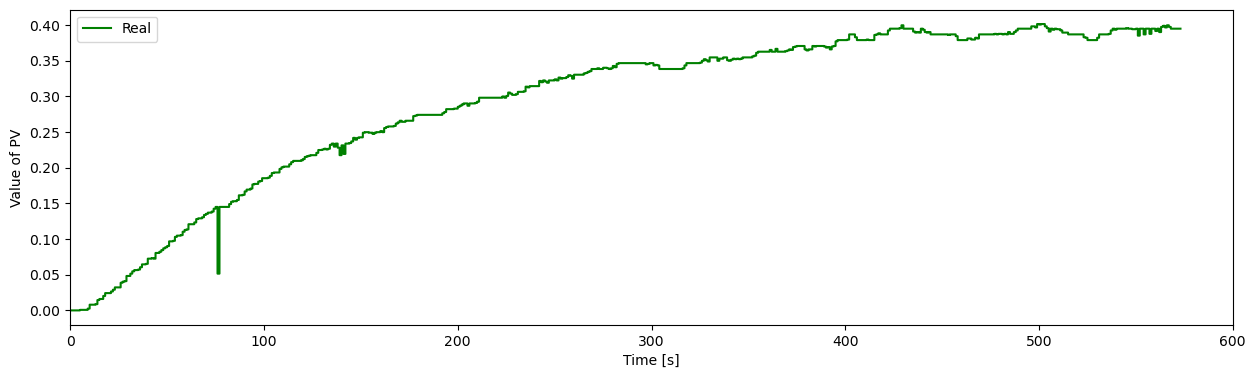

In [110]:
plt.figure(figsize = (15,9))

plt.subplot(2,1,2)
plt.step(tm,PVm,'green',label='Real',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, 600])    